In [1]:
from astroquery.sdss import SDSS
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.rcParams.update({'font.size':14, 'figure.figsize':(12,7)})

In [2]:
SDSS.AVAILABLE_TEMPLATES

{'star_O': 0,
 'star_OB': 1,
 'star_B': 2,
 'star_A': [3, 4],
 'star_FA': 5,
 'star_F': [6, 7],
 'star_G': [8, 9],
 'star_K': 10,
 'star_M1': 11,
 'star_M3': 12,
 'star_M5': 13,
 'star_M8': 14,
 'star_L1': 15,
 'star_wd': [16, 20, 21],
 'star_carbon': [17, 18, 19],
 'star_Ksubdwarf': 22,
 'galaxy_early': 23,
 'galaxy': [24, 25, 26],
 'galaxy_late': 27,
 'galaxy_lrg': 28,
 'qso': 29,
 'qso_bal': [30, 31],
 'qso_bright': 32}

In [3]:
K_star_template_list = SDSS.get_spectral_template('star_K')

In [4]:
B_star = SDSS.get_spectral_template('star_OB')[0][0]

In [5]:
B_star.header

SIMPLE  =                    T                                                  
BITPIX  =                  -32                                                  
NAXIS   =                    2                                                  
NAXIS1  =                 3823                                                  
NAXIS2  =                    4                                                  
TAI     =        4495084427.73 / 1st row - Number of seconds since Nov 17 1858  
RA      =            233.67721 / 1st row - Right ascension of telescope boresigh
DEC     =            3.258306  / 1st row - Declination of telescope boresight (d
EQUINOX =              2000.00 /                                                
RADECSYS= 'FK5     '           /                                                
AZ      =        306.044061683 / 1st row - Azimuth  (encoder) of tele (0=N?) (de
ALT     =        46.1492242848 / 1st row - Altitude (encoder) of tele        (de
AIRMASS =        1.368616163

In [6]:
bincount = len(B_star.data[0])
wavelen = np.ones((bincount, )) * B_star.header['COEFF0'] + np.cumsum(np.ones((bincount, )) * B_star.header['COEFF1'])
wavelen = np.power(10., wavelen)

In [2]:
def ExtractWavelengths(sdss_spectrum):
    '''Input an sdss spectrum (i.e. astropy HDUList object)
    and get the used wavelengths as a flat 1D array.'''
    
    ### number of 
    bincount = len(sdss_spectrum.data[0])
    preproc_wl = np.ones((bincount,)) * sdss_spectrum.header['COEFF0'] + np.cumsum(np.ones((bincount,)) * sdss_spectrum.header['COEFF1'])
    
    return np.power(10., preproc_wl)

In [8]:
B_star.header['COEFF0']

3.5817

In [9]:
np.cumsum(np.ones((bincount, 1)) * B_star.header['COEFF1'])

array([1.000e-04, 2.000e-04, 3.000e-04, ..., 3.821e-01, 3.822e-01,
       3.823e-01])

In [10]:
bincount

3823

In [11]:
wavelen.shape

(3823,)

In [12]:
wavelen = ExtractWavelengths(B_star)

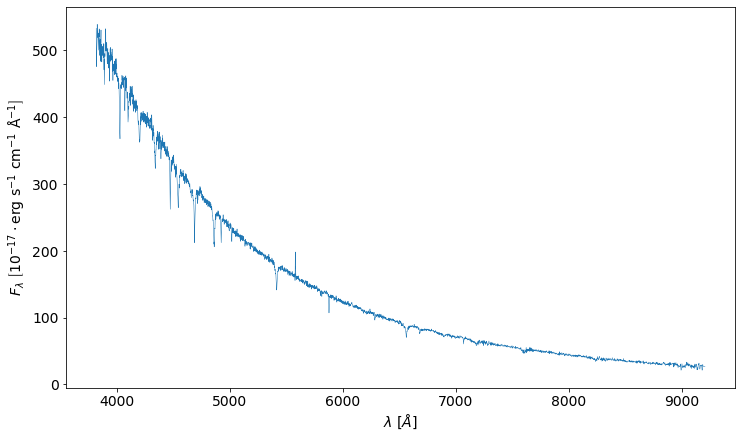

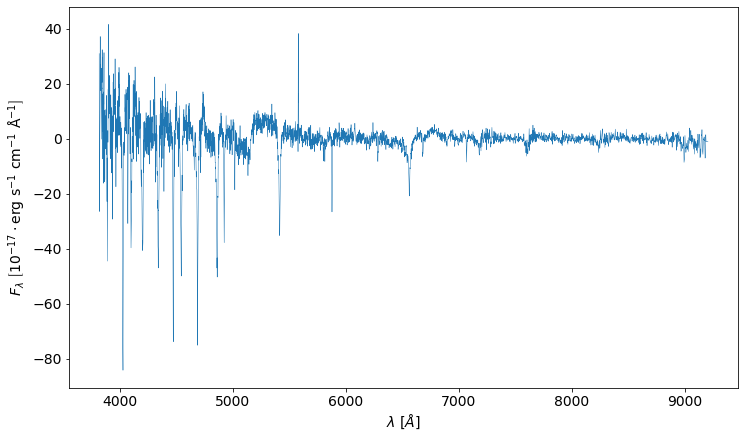

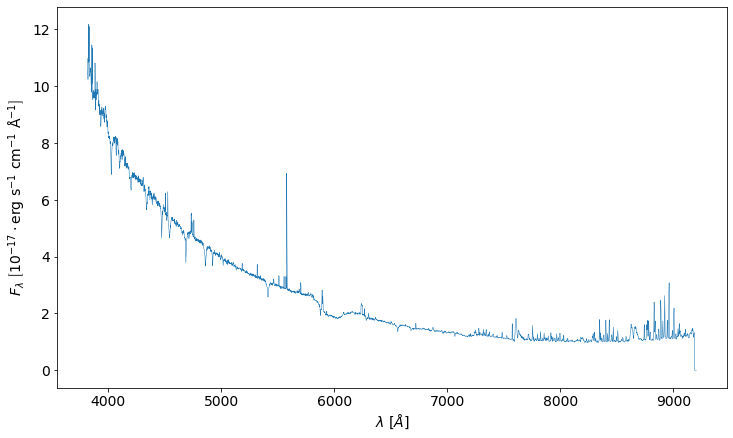

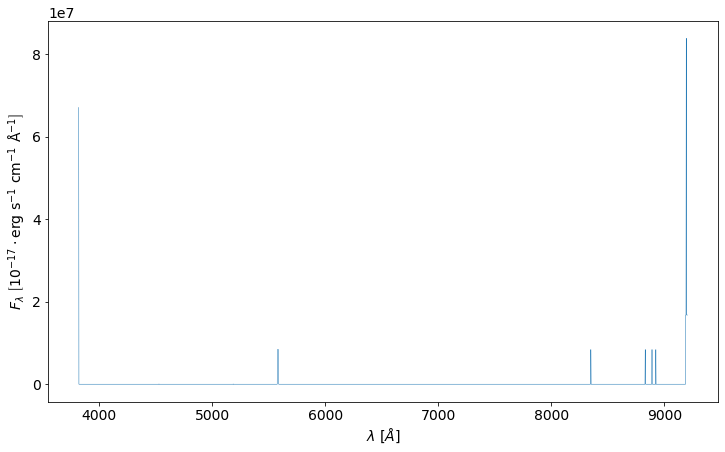

In [13]:
for j, d_set in enumerate(B_star.data):
    plt.figure()
    plt.plot(wavelen, d_set, linewidth=0.5)
    plt.xlabel(r'$\lambda\ [\AA]$')
    plt.ylabel(r'$F_\lambda\ \left[10^{-17}\cdot\mathrm{erg\ s^{-1}\ cm^{-1}\ \AA^{-1}}\right]$')

In [14]:
K_star = SDSS.get_spectral_template('star_K')[0][0]

In [15]:
K_mag_g = K_star.header['MAG_G']
K_mag_r = K_star.header['MAG_R']

In [16]:
K_mag_g, K_mag_r

(15.0462, 14.5727)

In [3]:
def gr_to_V(mag_g, mag_r):
    return mag_g - 0.59*(mag_g - mag_r) - 0.01

In [18]:
gr_to_V(K_mag_g, K_mag_r)

14.756835

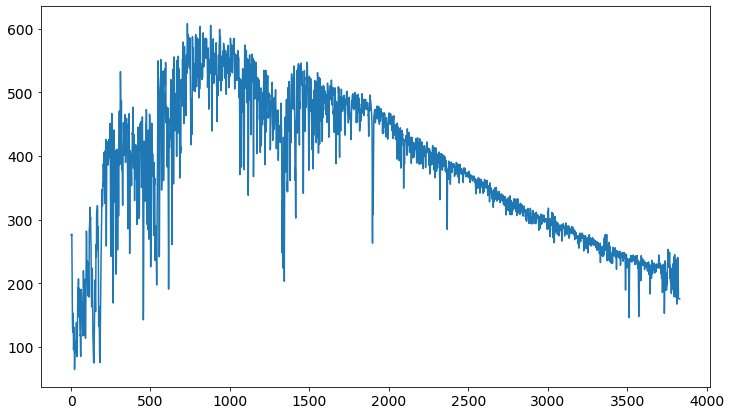

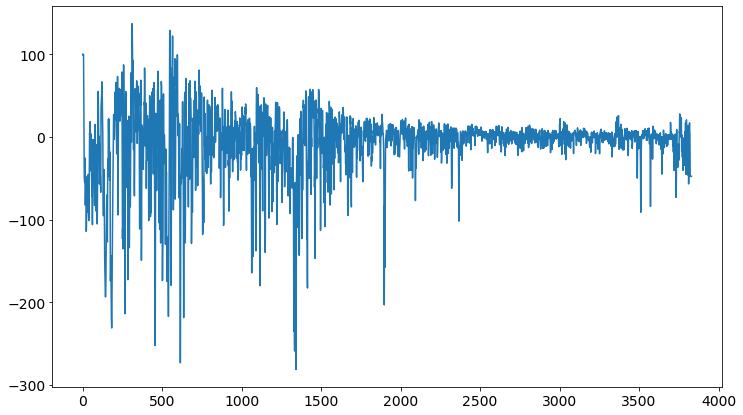

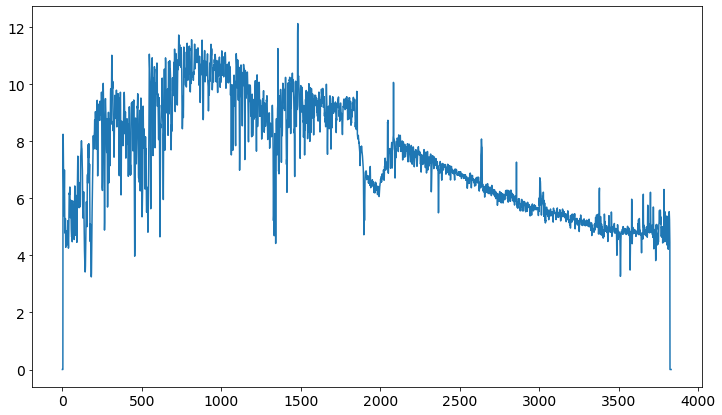

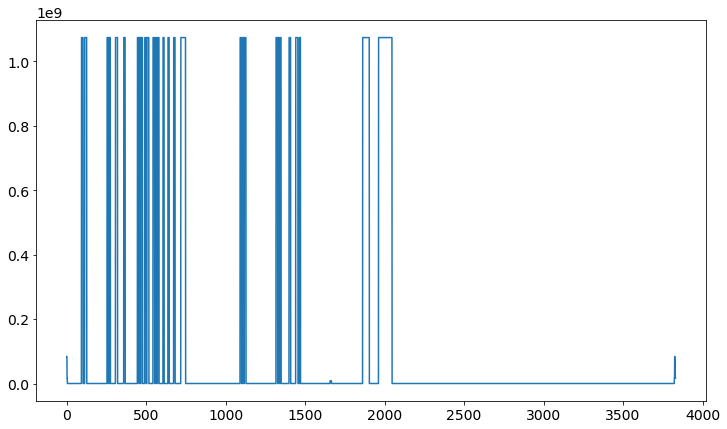

In [19]:
for j in range(0,4):
    plt.figure()
    plt.plot(K_star.data[j])

In [20]:
np.shape(SDSS.get_spectral_template("star_K")[0])

(7,)

In [21]:
K_star_list = SDSS.get_spectral_template('star_K')[0]


In [22]:
K_star_list[0].header

SIMPLE  =                    T                                                  
BITPIX  =                  -32                                                  
NAXIS   =                    2                                                  
NAXIS1  =                 3831                                                  
NAXIS2  =                    4                                                  
TAI     =        4476934007.54 / 1st row - Number of seconds since Nov 17 1858  
RA      =            16.470157 / 1st row - Right ascension of telescope boresigh
DEC     =           -0.006069  / 1st row - Declination of telescope boresight (d
EQUINOX =              2000.00 /                                                
RADECSYS= 'FK5     '           /                                                
AZ      =        329.651129318 / 1st row - Azimuth  (encoder) of tele (0=N?) (de
ALT     =        53.0898475518 / 1st row - Altitude (encoder) of tele        (de
AIRMASS =        1.238593738

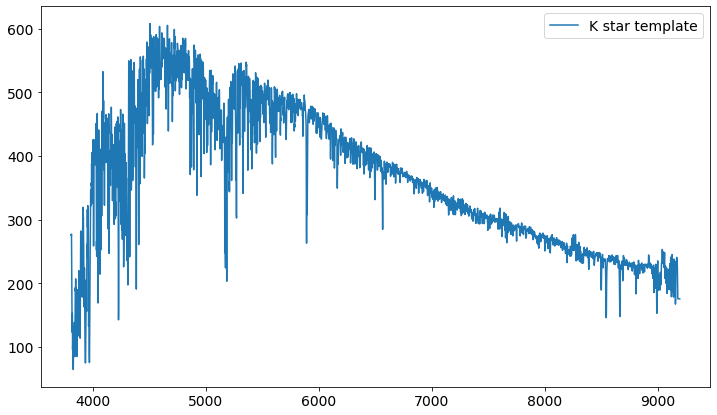

In [23]:
plt.figure()

plt.plot(ExtractWavelengths(K_star_list[0]), K_star_list[0].data[0], label='K star template')
plt.legend()

plt.show()

### Plot SED of A0620 vs. Stellar templates for different AV

In [4]:
phase_g, flux_g, del_flux_g = np.loadtxt('/home/yahecker/Obs_Data/A0620/mag_g.txt', usecols=(1, 2, 3), unpack=True)
phase_r, flux_r, del_flux_r = np.loadtxt('/home/yahecker/Obs_Data/A0620/mag_r.txt', usecols=(1, 2, 3), unpack=True)
phase_i, flux_i, del_flux_i = np.loadtxt('/home/yahecker/Obs_Data/A0620/mag_i.txt', usecols=(1, 2, 3), unpack=True)
phase_z, flux_z, del_flux_z = np.loadtxt('/home/yahecker/Obs_Data/A0620/mag_z.txt', usecols=(1, 2, 3), unpack=True)
phase_J, flux_J, del_flux_J = np.loadtxt('/home/yahecker/Obs_Data/A0620/mag_J.txt', usecols=(1, 2, 3), unpack=True)
phase_H, flux_H, del_flux_H = np.loadtxt('/home/yahecker/Obs_Data/A0620/mag_H.txt', usecols=(1, 2, 3), unpack=True)
phase_K, flux_K, del_flux_K = np.loadtxt('/home/yahecker/Obs_Data/A0620/mag_K.txt', usecols=(1, 2, 3), unpack=True)

In [6]:
Lambda_mean = np.array([4586, 6220, 7641, 8989, 12398, 16468, 21706])
dLambda = np.array([746, 847, 501, 637, 1183, 1351, 1516])

AV_weights = [1.282,
              0.897,
              0.641,
              0.513,
              0.385,
              0.256,
              0.128]

colors = ['royalblue', 'limegreen', 'goldenrod', 'tomato', 'purple', 'orange', 'grey']

In [26]:
np.min(phase_g), np.min(phase_r), np.min(phase_i), np.min(phase_z), np.min(phase_J), np.min(phase_H), np.min(phase_K)

(0.02437030287,
 0.02437030287,
 0.02437030287,
 0.02437030287,
 0.02524023421,
 0.02524023421,
 0.02524023421)

In [7]:
SED = np.zeros(7)
D_SED = np.zeros(7)

PHASES = [phase_g, phase_r, phase_i, phase_z, phase_J, phase_H, phase_K]
FLUXES = [flux_g, flux_r, flux_i, flux_z, flux_J, flux_H, flux_K]
DELTAS = [del_flux_g, del_flux_r, del_flux_i, del_flux_z, del_flux_J, del_flux_H, del_flux_K]

for j, fl in enumerate(FLUXES):
    SED[j] = fl[np.argmin(PHASES[j])]
    D_SED[j] = DELTAS[j][np.argmin(PHASES[j])]

#### Get the synthetic spectra for KV star 

In [28]:
KV_spectrum = SDSS.get_spectral_template('star_K')[0][0]

In [40]:
def ConvolveSpectrum(input_spectrum, filter_kernel, band_index=1):
    '''Convolve a spectrum with a given filter kernel (i.e. transmission curve).'''
    
    wavelengths = ExtractWavelengths(input_spectrum)
        
    if wavelengths.shape != filter_kernel[0].shape:
        
        # raise ValueError('Incompatible shapes ({} in the spectrum vs. {} in the filter)'.format(wavelengths.shape, filter_kernel[0].shape))
        
        print('WARNING: Spectrum and kernel shapes incompatible. Using interpolation of filter transmission curve.')
        
        ### return the integral (=sum) over the interpolated transmission curve * SDSS spectrum
        return np.sum(np.interp(wavelengths, filter_kernel[0], filter_kernel[band_index], left=0, right=0)*input_spectrum.data[0]) 
    
    return np.sum(np.where(wavelengths==filter_kernel[0]), input_spectrum.data[0]*filter_kernel[band_index], 0)
    

In [30]:
GROND_transmissions = np.loadtxt('/home/yahecker/GROND_transmissions.txt', unpack=True)

In [31]:
GROND_transmissions[0] = GROND_transmissions[0] * 10

In [41]:
ConvolveSpectrum(KV_spectrum, GROND_transmissions)

404510.78946430364

In [42]:
def FluxToMag(flux, lambdaeff):
    return -2.5*np.log10(flux)-2.402-5.0*np.log10(lambdaeff)

In [44]:
test_index = 0
FluxToMag(ConvolveSpectrum(KV_spectrum, GROND_transmissions, test_index+1), Lambda_mean[test_index])

-34.726495526928815

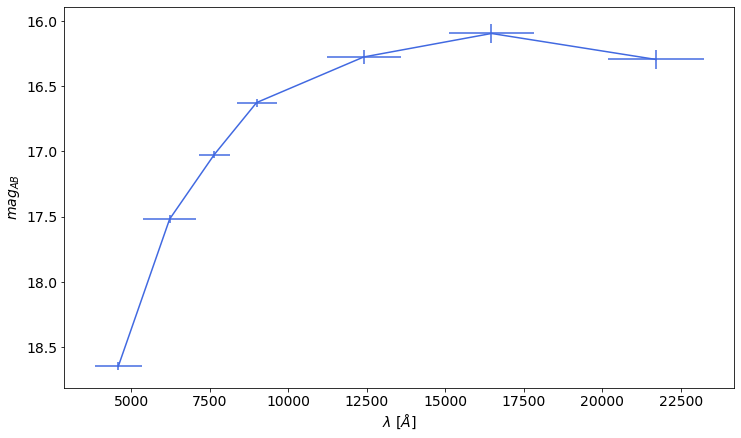

In [35]:
plt.errorbar(Lambda_mean, SED, D_SED, dLambda, color=colors[0], label='A06 data closest to phase 0')

plt.xlabel(r'$\lambda\ [\AA]$')
plt.ylabel(r'$mag_{AB}$')

plt.gca().invert_yaxis()

In [36]:
m_obs = gr_to_V(SED[0], SED[1])

## Observed brightness expectation over distance plot

#### not needed anymore

with open('../av.txt','r') as av:
    extinctions = np.array(av.readline().strip().strip('[').strip(']').split(','), dtype=float)
    distances = np.array(av.readline().strip().strip('[').strip(']').split(','), dtype=float)

distances

extinctions

np.savetxt('../AV_towards_A0620.txt', np.array([distances, extinctions]).transpose(), fmt='%.12f', header='distance A_V')

#### this is the way

In [37]:
distances, AV_north, AV_south, AV_all = np.loadtxt('/home/yahecker/AV_towards_A0620.txt', unpack=True)

In [38]:
plt.rcParams.update({'font.size':18})

In [39]:
### correction to observed magnitude for given veiling:
def VeilingMagCorrection(ratio=1.0):
    assert 0 <= ratio and 1 >= ratio, 'Physical ratios of a total are restircted to the domain [0, 1]. Please abide with that.'
    return -2.5*np.log10(ratio)

In [40]:
VeilingMagCorrection(0.4)

0.994850021680094

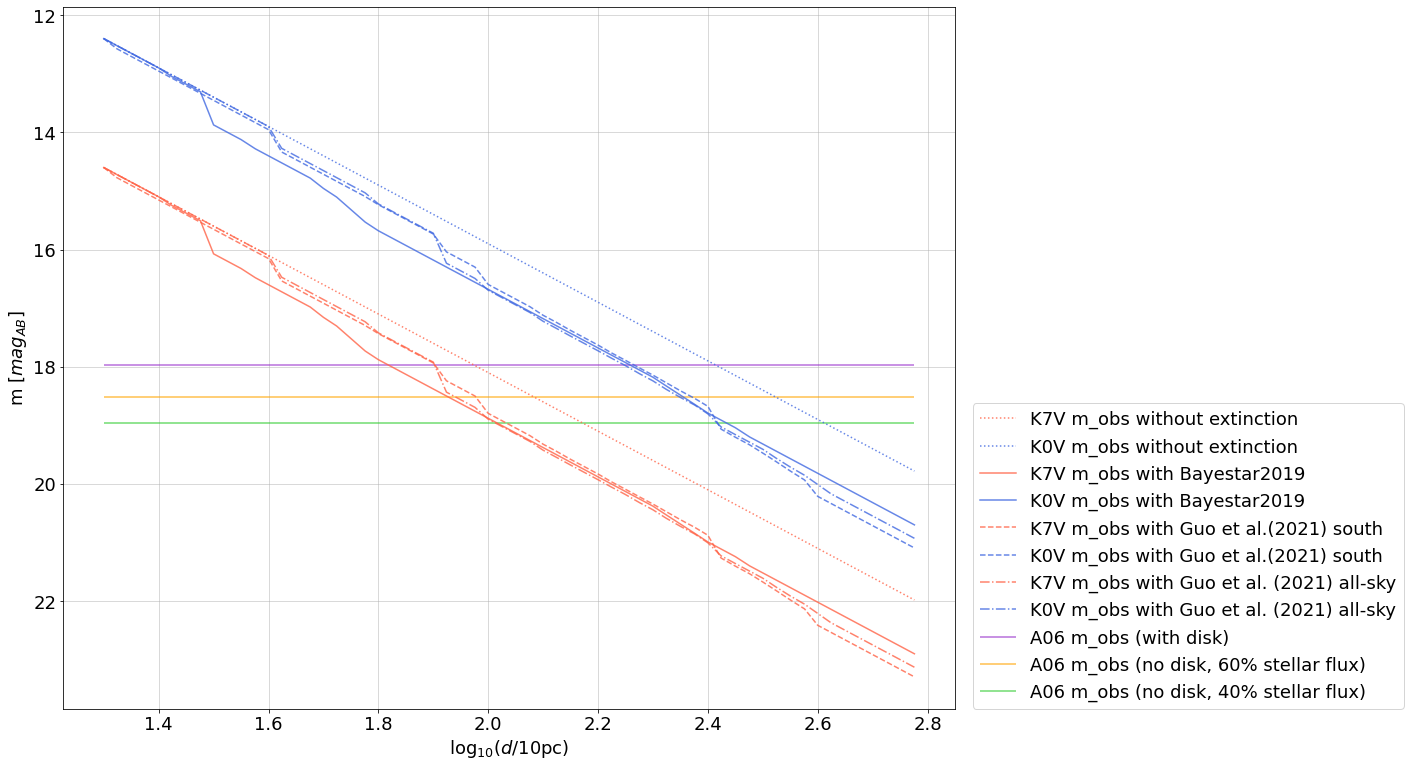

In [41]:
### K7 main sequence star; T = ~3850 K
M_V_K7V = 8.1

### K0 main sequence star; T = ~4750 K
M_V_K0V = 5.9

### m_obs - M - A = 5 * log10( d / 10pc)
logd = np.log10(distances / 10.)

# colors = ['r', 'b', 'grey']
styles =['-', '--', '-.']
extinctions = [AV_north, AV_south, AV_all]
names = ['Bayestar2019', 'Guo et al.(2021) south', 'Guo et al. (2021) all-sky']

### data frame to present the results neatly later
K0_AV_arr = np.zeros((len(names), 3))
K7_AV_arr = np.zeros((len(names), 3))
K0_dist_arr = np.zeros((len(names), 3))
K7_dist_arr = np.zeros((len(names), 3))

plt.figure(figsize=(20, 11))

# plt.hlines(m_obs, distances.min(), distances.max(), label='m_obs of A06 (with disk)', colors='k')
plt.hlines(m_obs, logd.min(), logd.max(), label='A06 m_obs (with disk)', colors='darkorchid', alpha=0.7)
plt.hlines(m_obs + VeilingMagCorrection(0.6), logd.min(), logd.max(), label='A06 m_obs (no disk, 60% stellar flux)', colors=['orange'], alpha=0.7)
plt.hlines(m_obs + VeilingMagCorrection(0.4), logd.min(), logd.max(), label='A06 m_obs (no disk, 40% stellar flux)', colors=['limegreen'], alpha=0.7)

plt.gca().invert_yaxis()

plt.plot(logd, 5*logd + M_V_K7V, label='K7V m_obs without extinction', color='tomato', linestyle=':', alpha=0.8)
plt.plot(logd, 5*logd + M_V_K0V, label='K0V m_obs without extinction', color='royalblue', linestyle=':', alpha=0.8)

for j, extinc in enumerate(extinctions):

    # plt.semilogx(distances, 5*logd + M_V_K7V + extinc, label='K7V m_obs with {}'.format(names[j]), color=colors[j], linestyle='-', alpha=0.8)
    # plt.semilogx(distances, 5*logd + M_V_K7V, label='K7V m_obs without extinction', color=colors[j], linestyle='--', alpha=0.8)
    # plt.semilogx(distances, 5*logd + M_V_K0V + extinc, label='K0V m_obs with {}'.format(names[j]), color=colors[j], alpha=0.8, linestyle='-.')
    # plt.semilogx(distances, 5*logd + M_V_K0V, label='K0V m_obs without extinction', color=colors[j], linestyle=':', alpha=0.8)
    
    plt.plot(logd, 5*logd + M_V_K7V + extinc, label='K7V m_obs with {}'.format(names[j]), color='tomato', linestyle=styles[j], alpha=0.8)
    plt.plot(logd, 5*logd + M_V_K0V + extinc, label='K0V m_obs with {}'.format(names[j]), color='royalblue', linestyle=styles[j], alpha=0.8)
    
    # print('{} K7V solution:\tA_V = {:.3f} at around {:.3f}kpc\t(expected A_V ~ {})'.format(names[j], extinc[np.argmin((5*logd + M_V_K7V + extinc - m_obs)**2)], distances[np.argmin((5*logd + M_V_K7V + extinc - m_obs)**2)]/1000, 0.6) )
    # print('{} K0V solution:\tA_V = {:.3f} at around {:.3f}kpc\t(expected A_V ~ {})'.format(names[j], extinc[np.argmin((5*logd + M_V_K0V + extinc - m_obs)**2)], distances[np.argmin((5*logd + M_V_K0V + extinc - m_obs)**2)]/1000, 1.6) )
    
    for i, f in enumerate([1.0, 0.6, 0.4]):
        K0_AV_arr[j, i] = extinc[np.argmin((5*logd + M_V_K0V + extinc - m_obs - VeilingMagCorrection(f))**2)]
        K7_AV_arr[j, i] = extinc[np.argmin((5*logd + M_V_K7V + extinc - m_obs - VeilingMagCorrection(f))**2)]
        K0_dist_arr[j, i] = distances[np.argmin((5*logd + M_V_K0V + extinc - m_obs - VeilingMagCorrection(f))**2)]
        K7_dist_arr[j, i] = distances[np.argmin((5*logd + M_V_K7V + extinc - m_obs - VeilingMagCorrection(f))**2)]


plt.legend(loc=(1.02, 0))

# plt.xlabel('d [pc]')
plt.xlabel(r'$\log_{10}(d / 10$pc$)$')
plt.ylabel(r'm [$mag_{AB}$]')

plt.tight_layout()

plt.grid(alpha=0.6)

plt.savefig('/home/yahecker/FluxA06/plots/K7_K0_AV_distance_comparison.pdf', format='pdf')

plt.show()

In [42]:
print('K7V solution:\tA_V = {:.3f}\t(expected around {})'.format(extinctions[0][np.argmin((5*logd + M_V_K7V + extinctions[0] - m_obs)**2)], 0.6) )
print('K0V solution:\tA_V = {:.3f}\t(expected around {})'.format(extinctions[0][np.argmin((5*logd + M_V_K0V + extinctions[0] - m_obs)**2)], 1.6) )


K7V solution:	A_V = 0.779	(expected around 0.6)
K0V solution:	A_V = 0.779	(expected around 1.6)


In [43]:
f10_results = pd.DataFrame(data=np.concatenate((K0_AV_arr[:, 0], K0_dist_arr[:, 0], K7_AV_arr[:, 0], K7_dist_arr[:, 0])).reshape((4, 3)).transpose(), index=names, columns=['A_V for K0V', 'd for K0V [pc]', 'A_V for K7V', 'd for K7V [pc]'], dtype=float)
f06_results = pd.DataFrame(data=np.concatenate((K0_AV_arr[:, 1], K0_dist_arr[:, 1], K7_AV_arr[:, 1], K7_dist_arr[:, 1])).reshape((4, 3)).transpose(), index=names, columns=['A_V for K0V', 'd for K0V [pc]', 'A_V for K7V', 'd for K7V [pc]'], dtype=float)
f04_results = pd.DataFrame(data=np.concatenate((K0_AV_arr[:, 2], K0_dist_arr[:, 2], K7_AV_arr[:, 2], K7_dist_arr[:, 2])).reshape((4, 3)).transpose(), index=names, columns=['A_V for K0V', 'd for K0V [pc]', 'A_V for K7V', 'd for K7V [pc]'], dtype=float)


In [44]:
f10_results.attrs['stellar flux'] = 100
print(f10_results.to_string())

                           A_V for K0V  d for K0V [pc]  A_V for K7V  d for K7V [pc]
Bayestar2019                  0.779277     1778.279410     0.779277      666.806769
Guo et al.(2021) south        0.743551     1887.991349     0.334193      794.328235
Guo et al. (2021) all-sky     0.831473     1778.279410     0.321408      794.328235


In [45]:
f06_results.attrs['stellar flux'] = 60
print(f06_results.to_string())

                           A_V for K0V  d for K0V [pc]  A_V for K7V  d for K7V [pc]
Bayestar2019                  0.834940     2238.721139     0.779277      839.459987
Guo et al.(2021) south        0.760634     2376.840287     0.519723      946.237161
Guo et al. (2021) all-sky     0.873758     2238.721139     0.713485      891.250938


In [46]:
f04_results.attrs['stellar flux'] = 40
print(f04_results.to_string())

                           A_V for K0V  d for K0V [pc]  A_V for K7V  d for K7V [pc]
Bayestar2019                  0.890602     2654.605562     0.779277     1056.817509
Guo et al.(2021) south        1.044608     2654.605562     0.695707     1056.817509
Guo et al. (2021) all-sky     1.007111     2654.605562     0.794846     1056.817509
